<h1 align =center><font size = 5> Fourier Transform for Data Analysis</font></h1>

## The following code is the demonstration of how the fourier transform, the discrete fourier transform is able to help us analyze time series data 

## Introducution

In this notebook we assess the ability for the Fourier Transform to be utilized in data analysis.



### Asis A Sotelo
    Physics 101
    UCSB SUMMER 2019

In [373]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as pdr
import datetime
import warnings
import scipy as sp
import scipy.fftpack

warnings.filterwarnings('ignore')

## I. Demonstration of a simple signal with 3 different frequencies and its fourier transform

In [374]:
##DEFINING VARIABLES

FTIME = 32         # Range of Function
FS    = 128        # Samples Per Second 
NPTS  = FTIME * FS # Number of Points 
# FREQUENCIES
f1    = .5
f2    = 1.0
f3    = .8

## DEFINING DOMAIN AND RANGE

t = np.linspace(0, FTIME,NPTS)
y = np.sin(2.0*np.pi*f1*t) + .5 *np.cos(2.0*np.pi*f2*t) + .8*np.sin(2.0*np.pi*f3*t)

## The original signal with 3 Frequencies

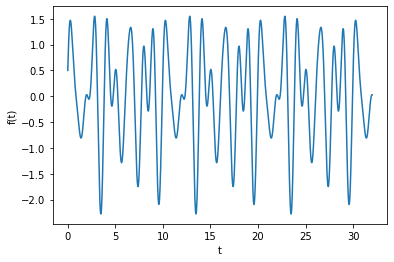

In [375]:
## PLOTTING THE VALUES OF THE SIGNAL WITH 3 FREQUENCIES
f1,ax1 = plt.subplots()
ax1.plot(t,y)
ax1.set_xlabel("t")
ax1.set_ylabel("f(t)")
f1.show()
f1.savefig("3Hz_Signal.png")

## The Fourier Transform of the Signal

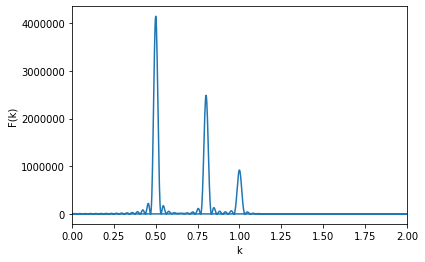

In [376]:
ft     = np.fft.fft(y,n = 16*NPTS) # Takes the Fourier Transform of Values
ftnorm = abs(ft)                   # Takes Positive Values only
ftnorm = ftnorm**2                 # Squares Values to Get the "Power"
xvals  = np.fft.fftfreq(len(ftnorm),1.0/FS) # Creates Domain with as Many Frequencies as Sample Points

## Graphs the Spectrum 

f2,ax2 = plt.subplots()            #
ax2.plot(xvals,ftnorm)
ax2.set_xlim(0,2)
ax2.set_xlabel("k")
ax2.set_ylabel("F(k)")
f2.savefig("3Hz_FFT")
f2.show()

In [377]:
aapl = pdr.get_data_yahoo('AAPL', start=datetime.datetime(2006,10,1),end=datetime.datetime(2012,1,1))

In [378]:
aapl.head()
aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,29.237566,28.507684,28.901012,28.889151,1.882896e+08,25.307736
std,14.199012,14.029758,14.123131,14.119734,1.027007e+08,12.369297
min,10.568571,10.371428,10.488571,10.461429,3.937360e+07,9.164515
25%,17.752857,17.182143,17.457857,17.431429,1.122037e+08,15.270439
50%,25.642857,24.725714,25.260000,25.120001,1.629866e+08,22.005852
75%,39.132858,38.351429,38.777143,38.699999,2.316230e+08,33.902319
max,60.957142,59.427143,60.251427,60.320000,8.432424e+08,52.842079


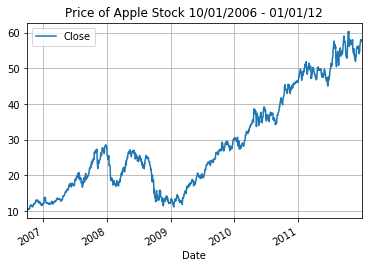

In [379]:
aapl['Close'].plot(grid = True)
plt.title("Price of Apple Stock 10/01/2006 - 01/01/12")
plt.legend()
plt.savefig("appl.png")

In [380]:
price = aapl["Close"]
time = np.linspace(0,1323,len(price))
length = len(price)
print(len(price))
print(len(time))

1323
1323


## The Polynomial fit to degree 20 of the data

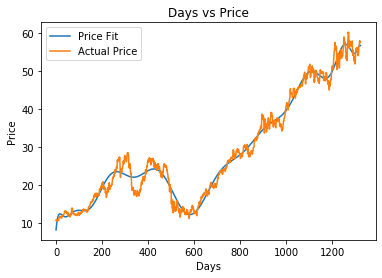

In [389]:
price_coeff = np.polyfit(time,price,20)
equat_price =np.poly1d(price_coeff)
price_fit   = equat_price(time)
f3,ax3      = plt.subplots()
ax3.plot(time,price_fit, label="Price Fit")
ax3.set_title("Days vs Price")
ax3.set_xlabel("Days")
ax3.set_ylabel("Price")
ax3.plot(time,price,label="Actual Price")
ax3.legend()
f3.savefig("polyfit.png")

We take this values between the numbers and find the fourier transform

In [382]:
diff = price-price_fit

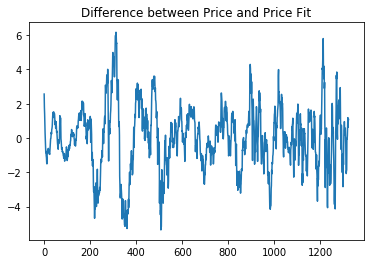

In [383]:
f4,ax4 = plt.subplots()
ax4.plot(time,diff)
ax4.set_title("Difference between Price and Price Fit")
f4.savefig("diff.png")

(0, 20)

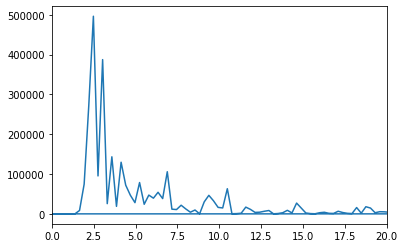

In [384]:
fft2 = np.fft.fft(diff,n = 1323)
fftnorm2 = abs(fft2)
fftnorm2 = fftnorm2**2                 # Squares Values to Get the "Power"
xvals  = np.fft.fftfreq(len(fftnorm2),1.0/365)



f5,ax5 = plt.subplots()            
ax5.plot(xvals,fftnorm2)
ax5.set_xlim(0,20)

## After noticing that most of the characteristic frequencies are within 0-20 we eliminate anything higher from the range.

1323
[3.0889717  2.3320807  1.94538211 ... 1.10571681 1.51358613 1.59277879]
1323


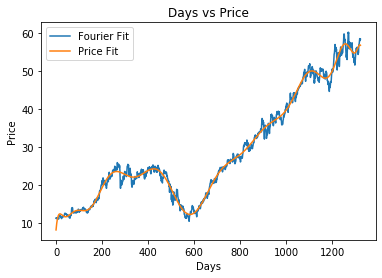

In [385]:
fft3 = fft2.copy()
fft3[np.abs(xvals) < 5] = 0
invfft = np.real(np.fft.ifft(fft3))
print(len(fft3))
print((invfft))
print(len(time))
invfft1 = price_fit + invfft

f6,ax6 = plt.subplots()  
ax6.set_title("Days vs Price")
ax6.set_xlabel("Days")
ax6.set_ylabel("Price")
ax6.plot(time,invfft1,label="Fourier Fit")
ax6.plot(time,price_fit,label = "Price Fit")
ax6.legend()
f6.savefig("ffitvpfit")

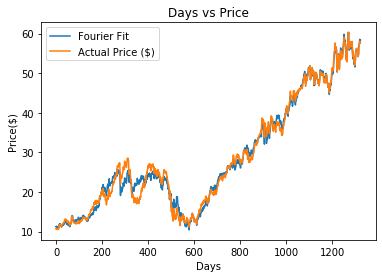

In [386]:
f7,ax7 = plt.subplots()            
ax7.set_title("Days vs Price")
ax7.set_xlabel("Days")
ax7.set_ylabel("Price($)")

ax7.plot(time,invfft1,label = "Fourier Fit")
ax7.plot(time,price,label="Actual Price ($)")
ax7.legend()
f7.savefig("ffitvaprice")